<a href="https://colab.research.google.com/github/GermanOmar/Wear/blob/master/Wear_HV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A machine learning approach for microhardness prediction and sliding wear evaluation in materials manufactured by laser powder bed fusion

<a href="https://ibb.co/3vvDZtg"><img src="https://i.ibb.co/Nrr8Bwc/Tests2-TIFF.png" WIDTH="620" HEIGHT="360"  border="0"></a>

 Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install lazypredict
warnings.filterwarnings("ignore")

     |████████████████████████████████| 6.8 MB 10.0 MB/s 
     |████████████████████████████████| 14.5 MB 7.7 kB/s 
     |████████████████████████████████| 25.9 MB 927 bytes/s 
     |████████████████████████████████| 248 kB 62.5 MB/s 
     |████████████████████████████████| 127.6 MB 22 kB/s 
     |████████████████████████████████| 72 kB 1.2 MB/s 
     |████████████████████████████████| 269 kB 72.2 MB/s 
     |████████████████████████████████| 10.1 MB 59.5 MB/s 
     |████████████████████████████████| 1.2 MB 44.2 MB/s 
     |████████████████████████████████| 302 kB 69.5 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=1802fe6924717b89f88d2f408e50b301679cb62a745320f414c1407fe64eb1e2
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfull

Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

 Upload database:

In [2]:
!git clone https://github.com/GermanOmar/Wear

Cloning into 'Wear'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [3]:
#Experimental data
data = pd.read_table('HV2.txt') 
data.describe()


,P,S,L,D,HV
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,193.013699,840.979452,45.684932,5.561233,410.906849
std,108.107906,846.483607,8.948738,2.289946,225.770134
min,80.000000,55.600000,20.000000,2.340000,118.000000
25%,100.000000,250.000000,50.000000,2.590000,188.000000
50%,150.000000,500.000000,50.000000,5.400000,393.200000
75%,280.000000,1000.000000,50.000000,7.800000,540.000000
max,500.000000,5000.000000,50.000000,8.010000,980.300000



Setting inputs - output:

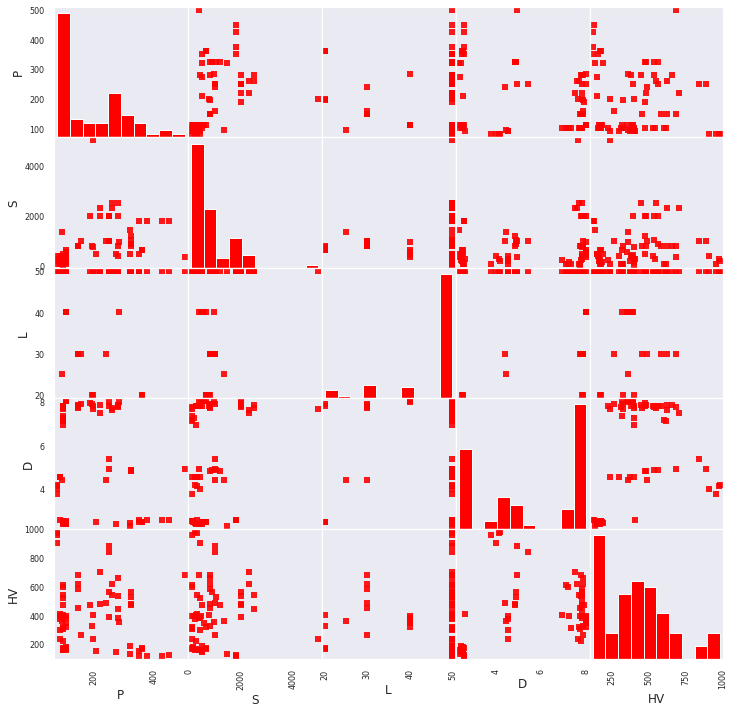

In [12]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
import seaborn as sns
sns.set()

plt.rcParams["axes.grid"] = False

#pd.tools.plotting.scatter_matrix(df, alpha=0.2, c='red', hist_kwds={'color':['burlywood']})

#scatter_matrix(data, alpha=0.2, marker='s', figsize = (12,12), color = 'blue')
scatter_matrix(data, alpha=0.9,marker='s', figsize = (12,12),  c='red', hist_kwds={'color':['red']})

warnings.filterwarnings("ignore")

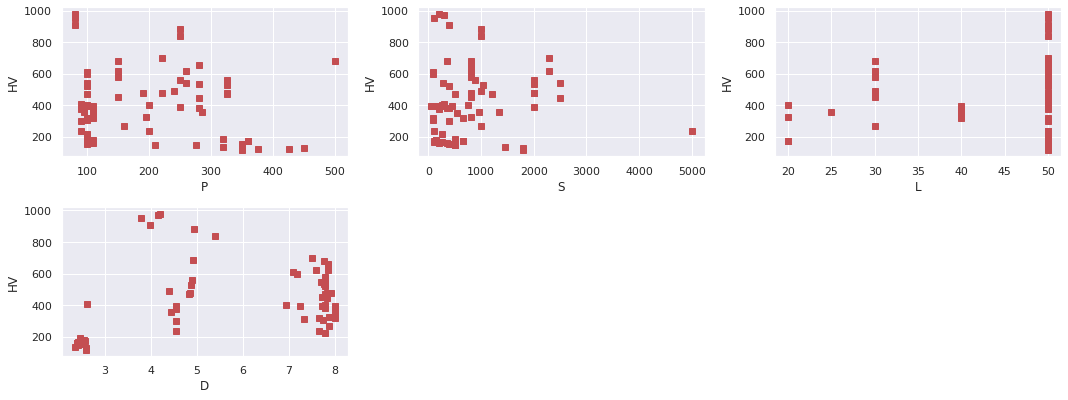

In [14]:
#fields = ['P', 'S', 'L',  'HD1',  'F', 'd' ]
fields = ['P', 'S', 'L',  'D'  ]
import seaborn as sns
sns.set_theme(style="darkgrid")

fig = plt.figure()
fig.set_size_inches((15,8))
for i, field in enumerate(fields):
  plt.subplot(3, 3, i + 1)
  plt.plot(data[field], data['HV'], 'rs')
  plt.xlabel(field)
  plt.ylabel('HV')

plt.tight_layout()

In [13]:
#X=data[['P', 'S', 'L',  'HD1',  'F', 'd' ]]
X=data[['P', 'S', 'L',  'D']]
Y=data['HV'][:,None]

# Hardness prediction

 Split data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 58  test samples: 15


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)


#Results:

In [17]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [18]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 29.84it/s]


                               Adjusted R-Squared  ...  Time Taken
Model                                              ...            
GradientBoostingRegressor                    0.92  ...        0.06
RandomForestRegressor                        0.88  ...        0.18
BaggingRegressor                             0.85  ...        0.03
XGBRegressor                                 0.84  ...        0.11
AdaBoostRegressor                            0.80  ...        0.08
ExtraTreesRegressor                          0.78  ...        0.10
DecisionTreeRegressor                        0.71  ...        0.01
ExtraTreeRegressor                           0.67  ...        0.01
KNeighborsRegressor                          0.22  ...        0.02
HuberRegressor                              -0.06  ...        0.03
OrthogonalMatchingPursuitCV                 -0.10  ...        0.02
OrthogonalMatchingPursuit                   -0.10  ...        0.01
TransformedTargetRegressor                  -0.11  ...        

# XGB

In [19]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

In [20]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9999999998872231


-XGBRegressor -
------------------
MSE test: 4103.156492967152

R2:  0.9335709301243099
RMSE:  64.05588570121525
MAE:  42.28572387695312
IM:  76.75443537403164



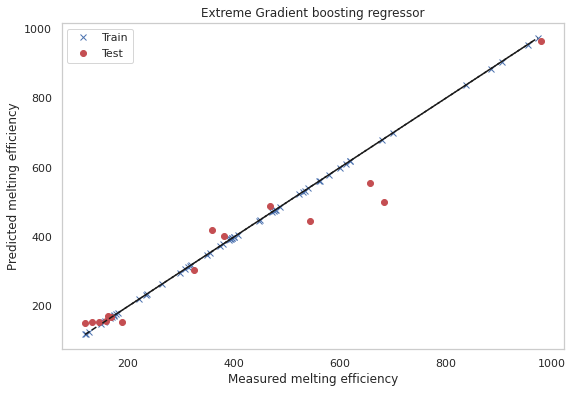

In [21]:
print("-XGBRegressor -")
print("------------------")
y_star_train = xgbr.predict(X_train)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted melting efficiency')
plt.xlabel('Measured melting efficiency')
plt.title("Extreme Gradient boosting regressor")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

In [ ]:
# initialize model and define the space of the hyperparameters to
# perform the grid-search over
model = xgbr
n_estimators = [10, 100, 1000, 10000]
learning_rate = [0.1, 0.01, 1e-3]
max_depth = [5, 20, 50, 100]
reg_lambda = [0.001, 0.01, 0.1, 1, 10]


grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth )

In [ ]:
# initialize a cross-validation fold and perform a randomized-search
# to tune the hyperparameters
print("[INFO] grid searching over the hyperparameters...")
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
randomSearch = RandomizedSearchCV(estimator=model, n_jobs=-1,
	cv=cvFold, param_distributions=grid,
	scoring="neg_mean_squared_error")
searchResults = randomSearch.fit(X_train, y_train)
# extract the best model and evaluate it
print("[INFO] evaluating...")
bestModel = searchResults.best_estimator_
print("R2: {:.2f}".format(bestModel.score(X_test, y_test)))
print(bestModel)

[INFO] grid searching over the hyperparameters...
[INFO] evaluating...
R2: 0.18
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=1234, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, seed=1234, silent=None,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=0)


In [22]:
# get importance

importance = xgbr.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: 0.29136
Feature: 1, Score: 0.13245
Feature: 2, Score: 0.04947
Feature: 3, Score: 0.52673


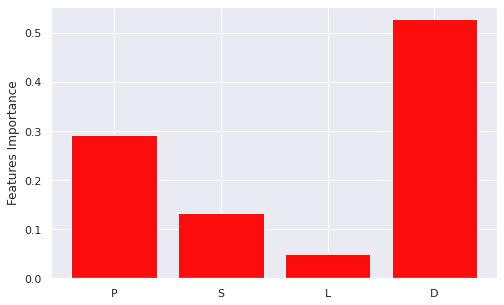

In [24]:
# Create lists for the plot
import seaborn as sns
sns.set()

#plt.rcParams["axes.grid"] = False

labels = ['P', 'S', 'L',  'D' ]
x_pos = np.arange(len(labels))

fig, ax = plt.subplots()
fig.set_size_inches((8,5))

ax.bar(x_pos, importance, align='center', alpha=0.95, color='red')
ax.set_ylabel('Features Importance')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
#ax.set_title('Features Importance Analysis')
ax.yaxis.grid(True)


#GBR

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR=GradientBoostingRegressor(n_estimators=5000, random_state=42, learning_rate=0.1 )

#START TRAINING
GBR.fit(X_train, y_train)
#PREDICTION
y_pred=GBR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

 
print("-Gradient boosting regressor-")
print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()


-Gradient boosting regressor-
-----------------------------
MSE test: 3085.2547560125126

R2:  0.9500505027963843
RMSE:  55.54506959229156
MAE:  43.84875656242936
IM:  70.76701705622455



# ADA

In [26]:
from sklearn.ensemble import AdaBoostRegressor

print(" AdaBoost -")
print("------------------")

Ada = AdaBoostRegressor(random_state=32, n_estimators=1000)
#START TRAINING
Ada.fit(X_train,y_train)
#PREDICTION
y_pred=Ada.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

 AdaBoost -
------------------
MSE test: 7234.845559551198

R2:  0.8828696731311583
RMSE:  85.05789533929932
MAE:  70.81435131984252
IM:  110.6776022143358



# RFR

In [27]:
from sklearn.ensemble import RandomForestRegressor
#KERNEL
RFR=RandomForestRegressor(n_estimators=2000,max_depth=20)

#START TRAINING
RFR.fit(X_train,y_train)
#PREDICTION
y_pred=RFR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-----------------------------
MSE test: 6219.076780127079

R2:  0.8993147137581889
RMSE:  78.86112337601512
MAE:  53.70985999999889
IM:  95.4140240157254



## Comparisson

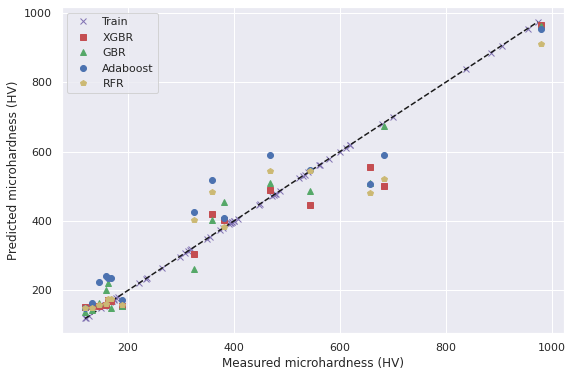

In [47]:
import seaborn as sns
sns.set()


y1=xgbr.predict(X_test)
y2=GBR.predict(X_test)
y3=Ada.predict(X_test)
y4=RFR.predict(X_test)

#Plots
#sns.set_theme(style="whitegrid")
#sns.set_theme(style="darkgrid")
plt.rcParams["axes.grid"] = True
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'mx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y1, 'rs', label = 'XGBR')
plt.plot(y_test, y2, 'g^', label = 'GBR')
plt.plot(y_test, y3, 'bo', label = 'Adaboost')
plt.plot(y_test, y4, 'yp', label = 'RFR')

plt.legend()
plt.ylabel('Predicted microhardness (HV)')
plt.xlabel('Measured microhardness (HV)')
#plt.title("Machine learning regressors")
print()

CROSS-VALIDATION

In [30]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [ xgbr,  GBR, Ada, RFR ]
labels = ['XGBR',  'GBR', 'Adaboost', 'RFR']
IMS = []

print("--------------------------------------------------------------")
print("%5s | %5s | %5s | %5s | %5s " % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE", "IM"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels): 
  #y_star = mod.predict(X)
 
  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)
  IM=np.sqrt(((1-scoreR2)**2) + (scoreMSE) + (scoreMAE**2) )
  #print("IM: ", IM)
  
 
  print("%15s | %.4f | %.4f | %.4f | %.4f " % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() , np.sqrt(((1-scoreR2.mean())**2) + (-1*scoreMSE.mean()) + (scoreMAE.mean()**2) )))
print("--------------------------------------------------------------")

--------------------------------------------------------------
ML algorithm | CV-R2 | CV-MSE | CV-MAE |    IM 
--------------------------------------------------------------
           XGBR | 0.5557 | 16111.4338 | 87.3516 | 154.0842 
            GBR | 0.5909 | 14549.9751 | 85.8374 | 148.0480 
       Adaboost | 0.5410 | 18136.2949 | 104.4257 | 170.4149 
            RFR | 0.5514 | 17097.9556 | 95.2713 | 161.7862 
--------------------------------------------------------------
